In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings(action = 'ignore')
%config InlineBackend.figure_format = 'retina'

# 분류

In [2]:
data = sns.load_dataset('penguins')

In [3]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
data.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<AxesSubplot:>

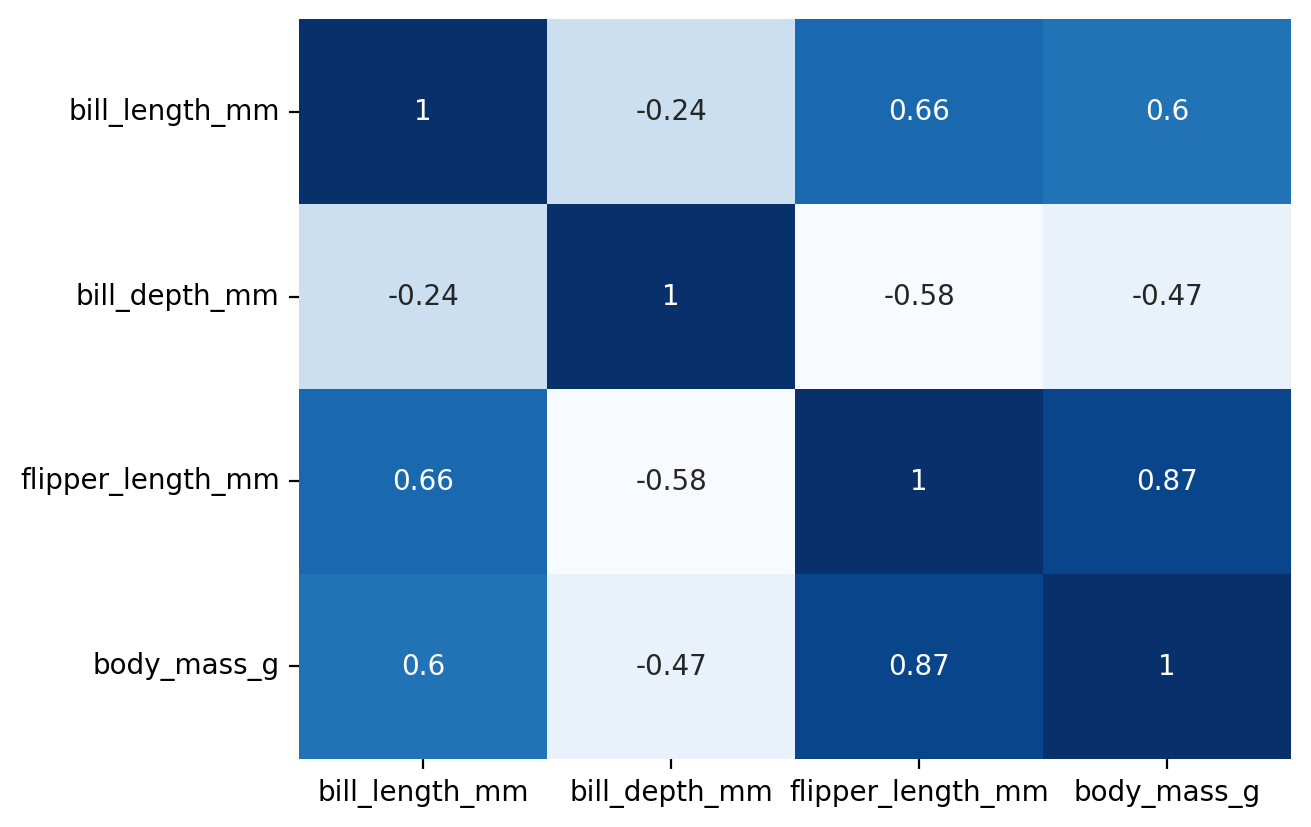

In [7]:
sns.heatmap(data.corr(),
           annot = True,
           cmap = 'Blues',
           cbar = False,
           annot_kws={'size': 10})

## 결측치

In [8]:
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

- 수치형 평균값이나 중앙값으로 채우기

In [9]:
data['bill_length_mm'].fillna(data['bill_length_mm'].mean(), inplace = True)
data['bill_depth_mm'].fillna(data['bill_depth_mm'].mean(), inplace = True)
data['flipper_length_mm'].fillna(data['flipper_length_mm'].mean(), inplace = True)
data['body_mass_g'].fillna(data['body_mass_g'].mean(), inplace = True)

- 명목형 최빈값으로 채우기

In [10]:
data['sex'].fillna(data['sex'].mode()[0], inplace = True)

In [11]:
data.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [13]:
target = 'species'

x= data.drop(target, axis = 1)
y = data.loc[:,target]

In [14]:
data[target].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

- 가변수화

In [15]:
dumm_cols = ['island','sex']
x = pd.get_dummies(x, columns = dumm_cols, drop_first=True)
x.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male
0,39.10000,18.70000,181.000000,3750.000000,0,1,1
1,39.50000,17.40000,186.000000,3800.000000,0,1,0
2,40.30000,18.00000,195.000000,3250.000000,0,1,0
3,43.92193,17.15117,200.915205,4201.754386,0,1,1
4,36.70000,19.30000,193.000000,3450.000000,0,1,0


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

## KNN
- MinMaxScaler 반드시 필요

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

model = KNeighborsClassifier()

model.fit(x_train_s, y_train)
y_pred = model.predict(x_test_s)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[46  0  0]
 [ 0 17  0]
 [ 1  0 40]]
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        46
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      0.98      0.99        41

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



## Decision Tree model

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

model = DecisionTreeClassifier()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[43  3  0]
 [ 0 17  0]
 [ 1  0 40]]
              precision    recall  f1-score   support

      Adelie       0.98      0.93      0.96        46
   Chinstrap       0.85      1.00      0.92        17
      Gentoo       1.00      0.98      0.99        41

    accuracy                           0.96       104
   macro avg       0.94      0.97      0.95       104
weighted avg       0.97      0.96      0.96       104



In [20]:
data['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

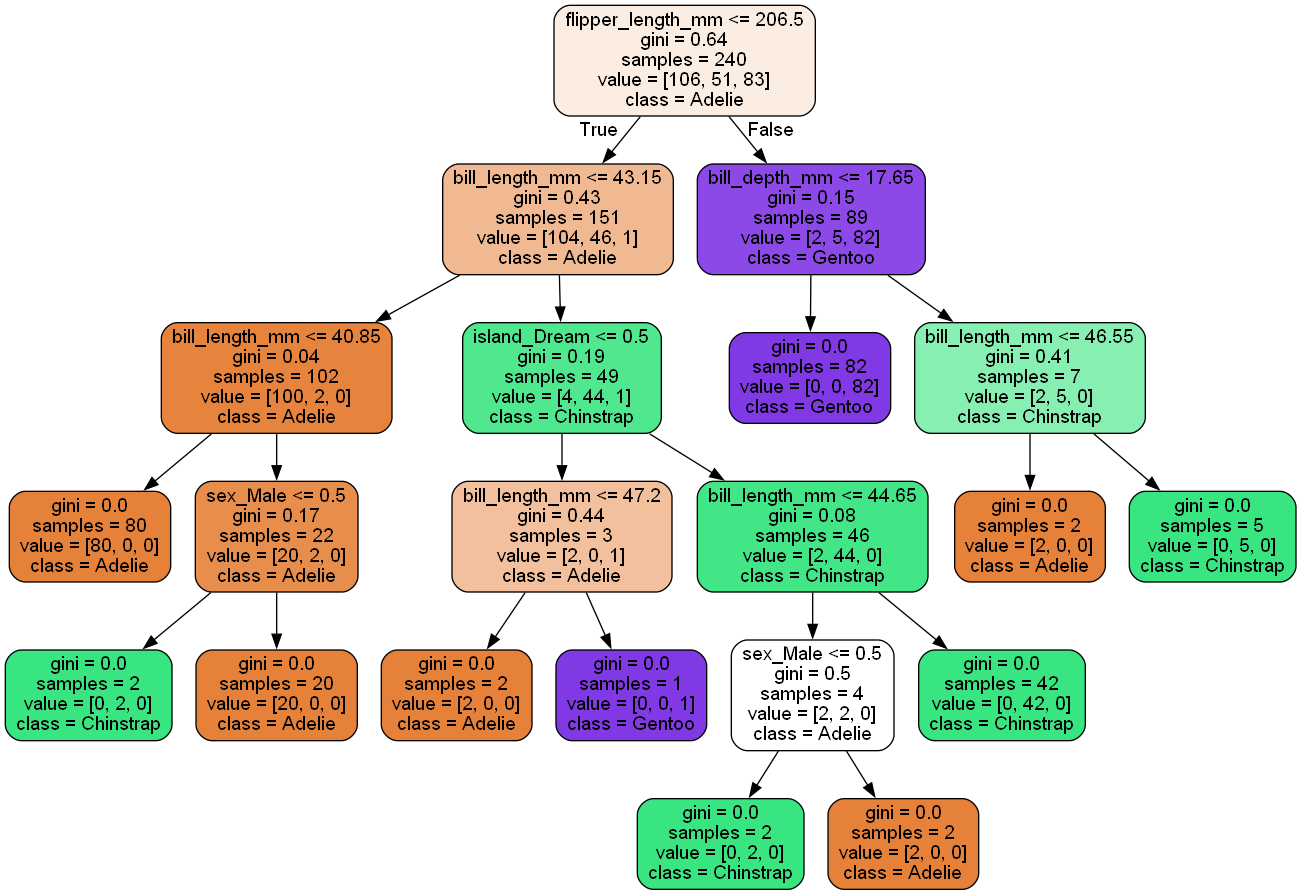

In [21]:
# 시각화 모듈 불러오기
from sklearn.tree import export_graphviz
from IPython.display import Image

# 이미지 파일 만들기
export_graphviz(model,                                               # 모델 이름
                out_file='tree.dot',                                 # 파일 이름 
                feature_names=x.columns,                             # Feature 이름
                class_names=['Adelie', 'Chinstrap', 'Gentoo'],       # Target Class 이름, 회귀 일때는 사용하지 않음
                rounded=True,                                        # 둥근 테두리
                precision=2,                                         # 불순도 소숫점 자리수
                filled=True)                                         # 박스 내부 채우기

# 파일 변환
!dot tree.dot -Tpng -otree.png 
# -Gdpi=300

# 이미지 파일 표시
Image(filename='tree.png')

In [22]:
list(x)

['bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'island_Dream',
 'island_Torgersen',
 'sex_Male']

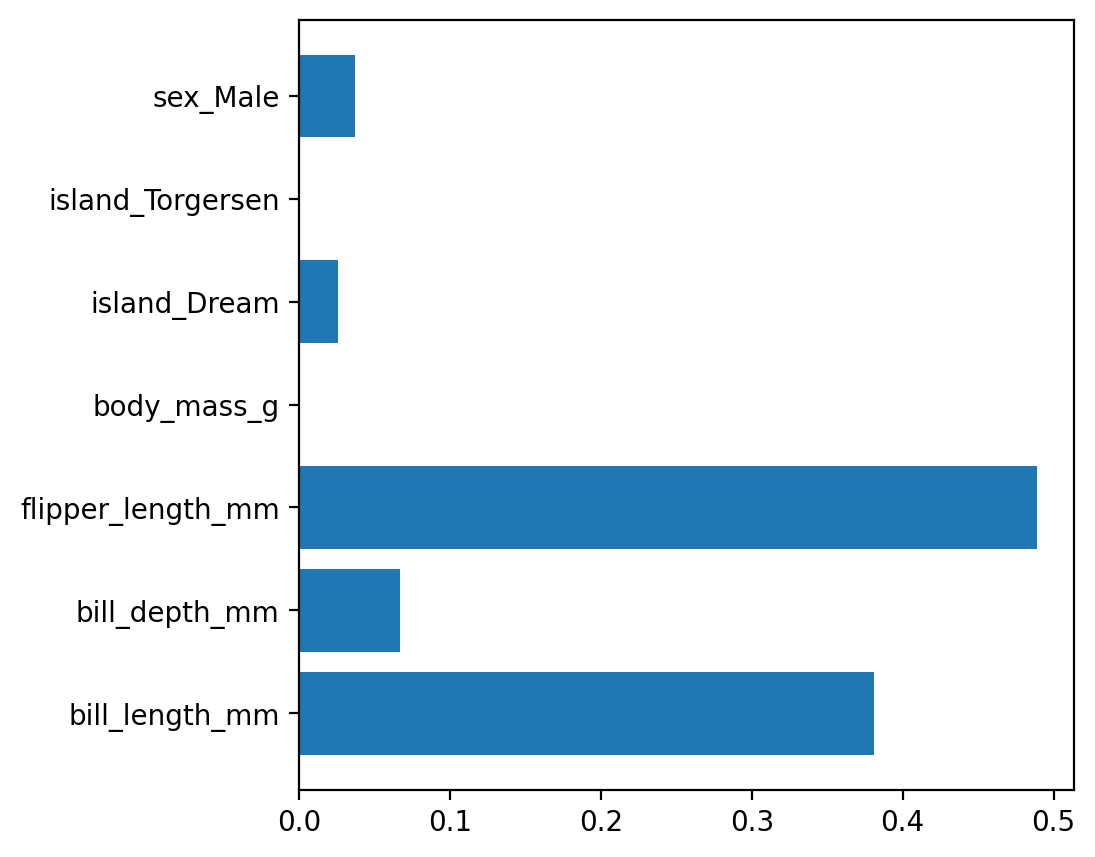

In [23]:
plt.figure(figsize=(5, 5))
plt.barh(list(x), model.feature_importances_)
plt.show()

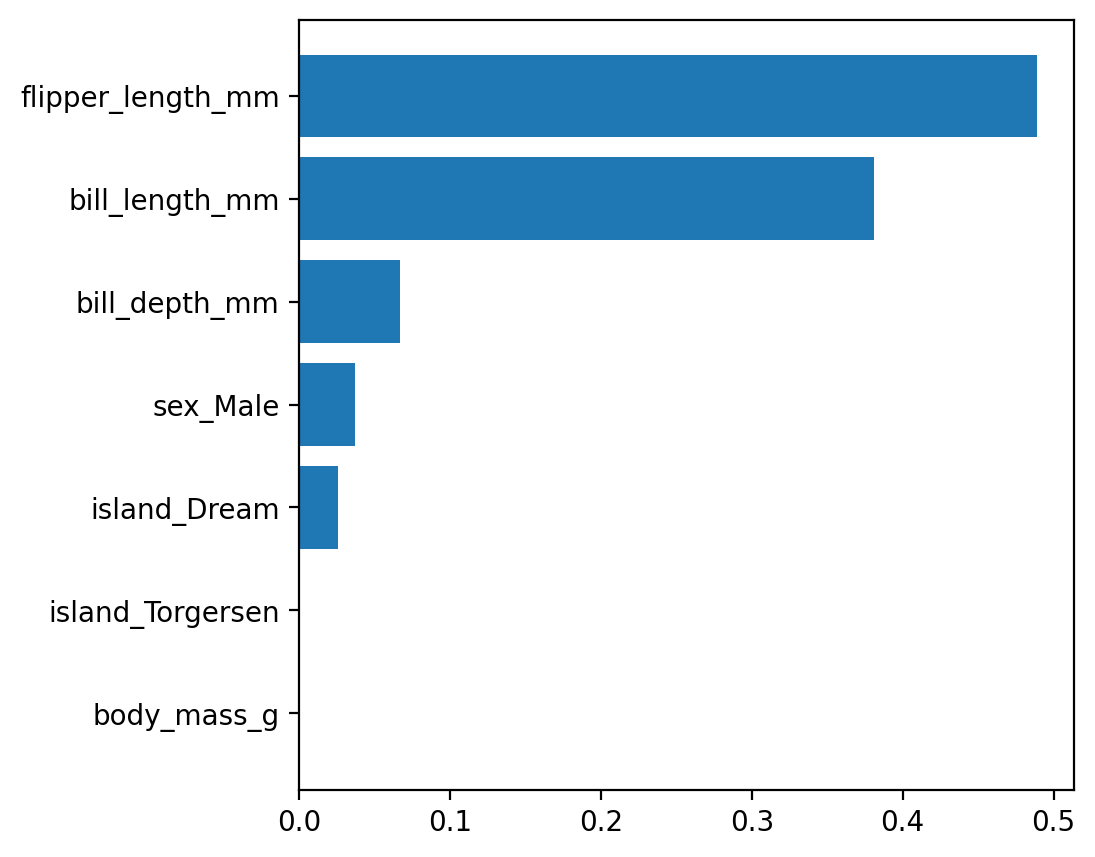

In [24]:
perf_dic = {'feature' : list(x), 'importance': model.feature_importances_}
df = pd.DataFrame(perf_dic)
df.sort_values(by = 'importance', ascending = True, inplace = True)

# 시각화
plt.figure(figsize=(5,5))
plt.barh(df['feature'], df['importance'])
plt.show()

# 회귀

In [25]:
data = sns.load_dataset('car_crashes')

In [26]:
data.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


## 결측치

필요없는 컬럼 제거

In [28]:
data.drop('abbrev', axis = 1, inplace = True)
data.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63


In [29]:
target = 'total'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [30]:
data.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

## LinearRegression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('MAE : ', mean_absolute_error(y_test, y_pred))
print('R2 : ', r2_score(y_test, y_pred))

MAE :  0.9914034365660316
R2 :  0.9248054095600372


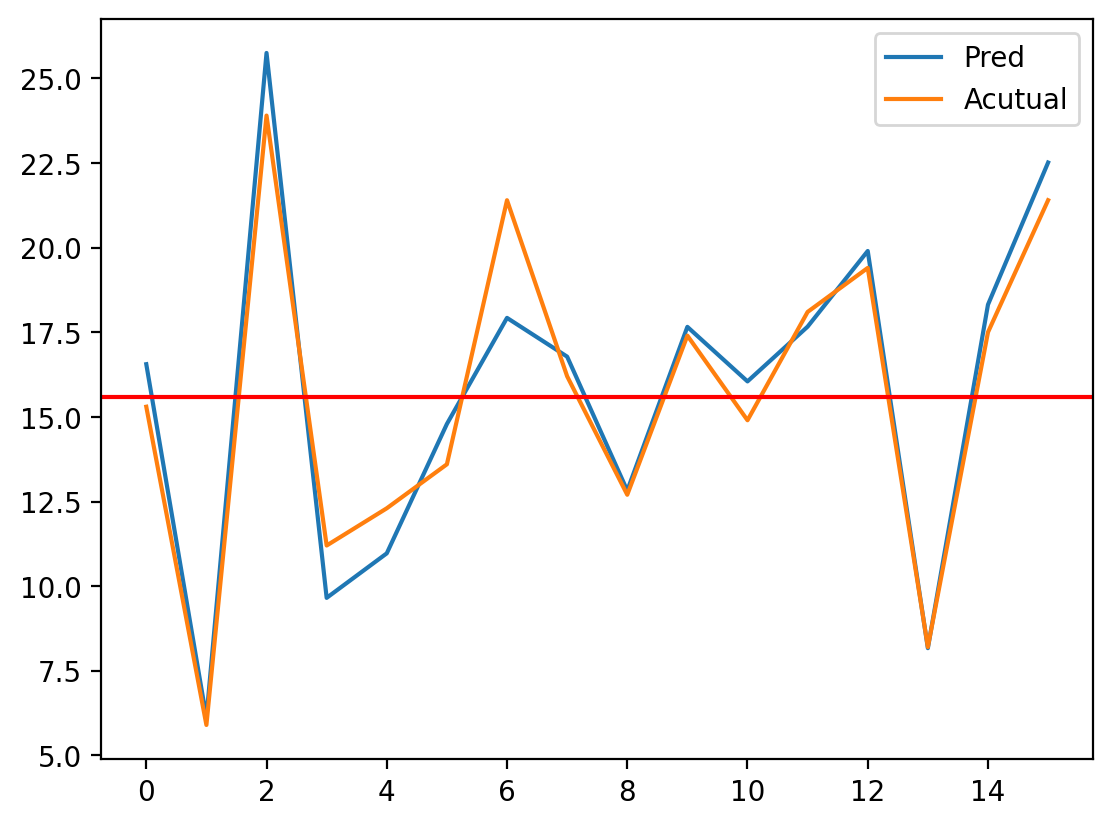

In [33]:
plt.plot(y_pred, label = 'Pred')
plt.plot(y_test.values, label = 'Acutual')
plt.legend()
plt.axhline(y_test.mean(), color = 'r')

## KNN

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score
model = KNeighborsRegressor()
model.fit(x_train_s, y_train)
y_pred = model.predict(x_test_s)

print('MAE : ', mean_absolute_error(y_test, y_pred))
print('R2 : ', r2_score(y_test, y_pred))

MAE :  1.58
R2 :  0.7864922120129437


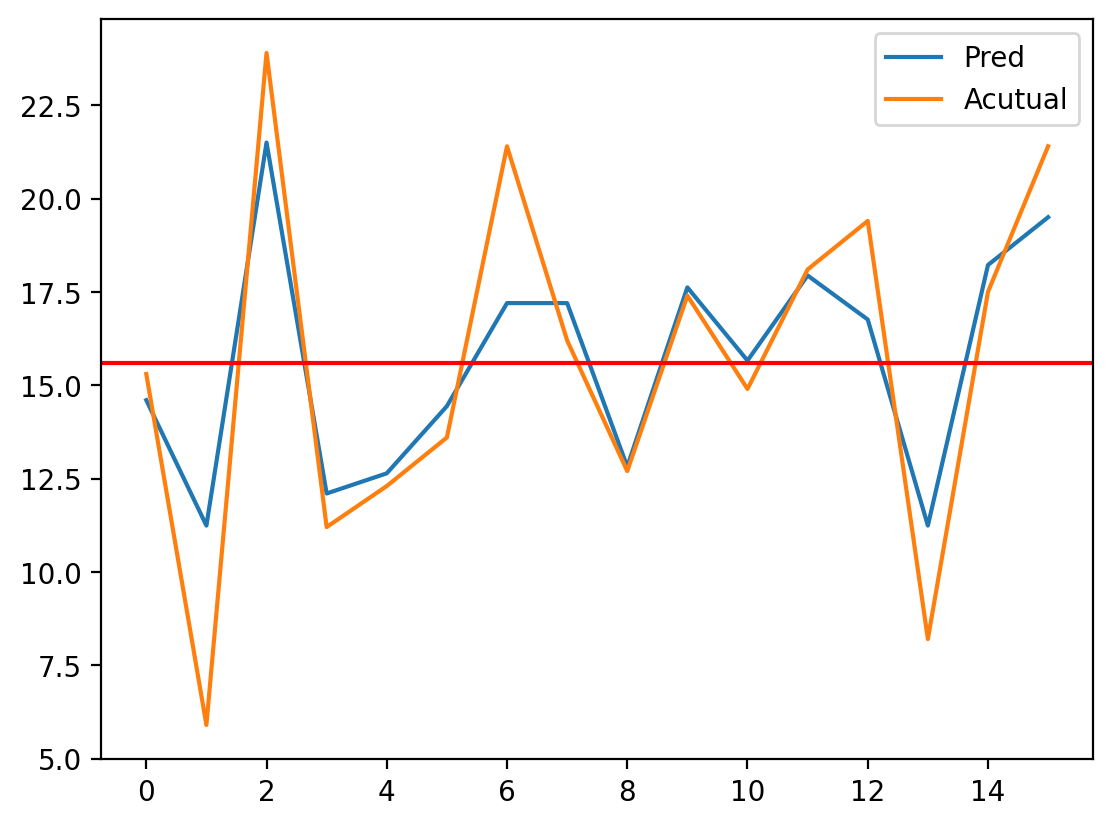

In [36]:
plt.plot(y_pred, label = 'Pred')
plt.plot(y_test.values, label = 'Acutual')
plt.legend()
plt.axhline(y_test.mean(), color = 'r')

## Decision Tree

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

1.3375
0.8633750517678275


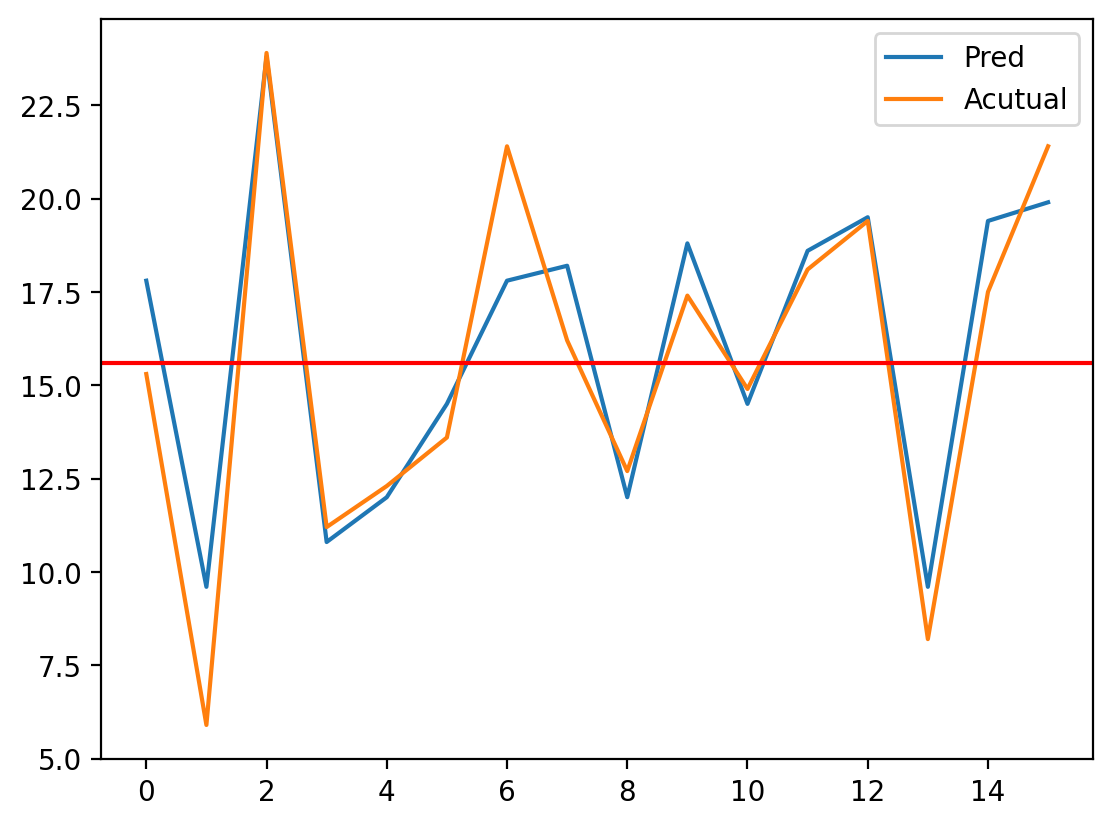

In [38]:
plt.plot(y_pred, label = 'Pred')
plt.plot(y_test.values, label = 'Acutual')
plt.legend()
plt.axhline(y_test.mean(), color = 'r')

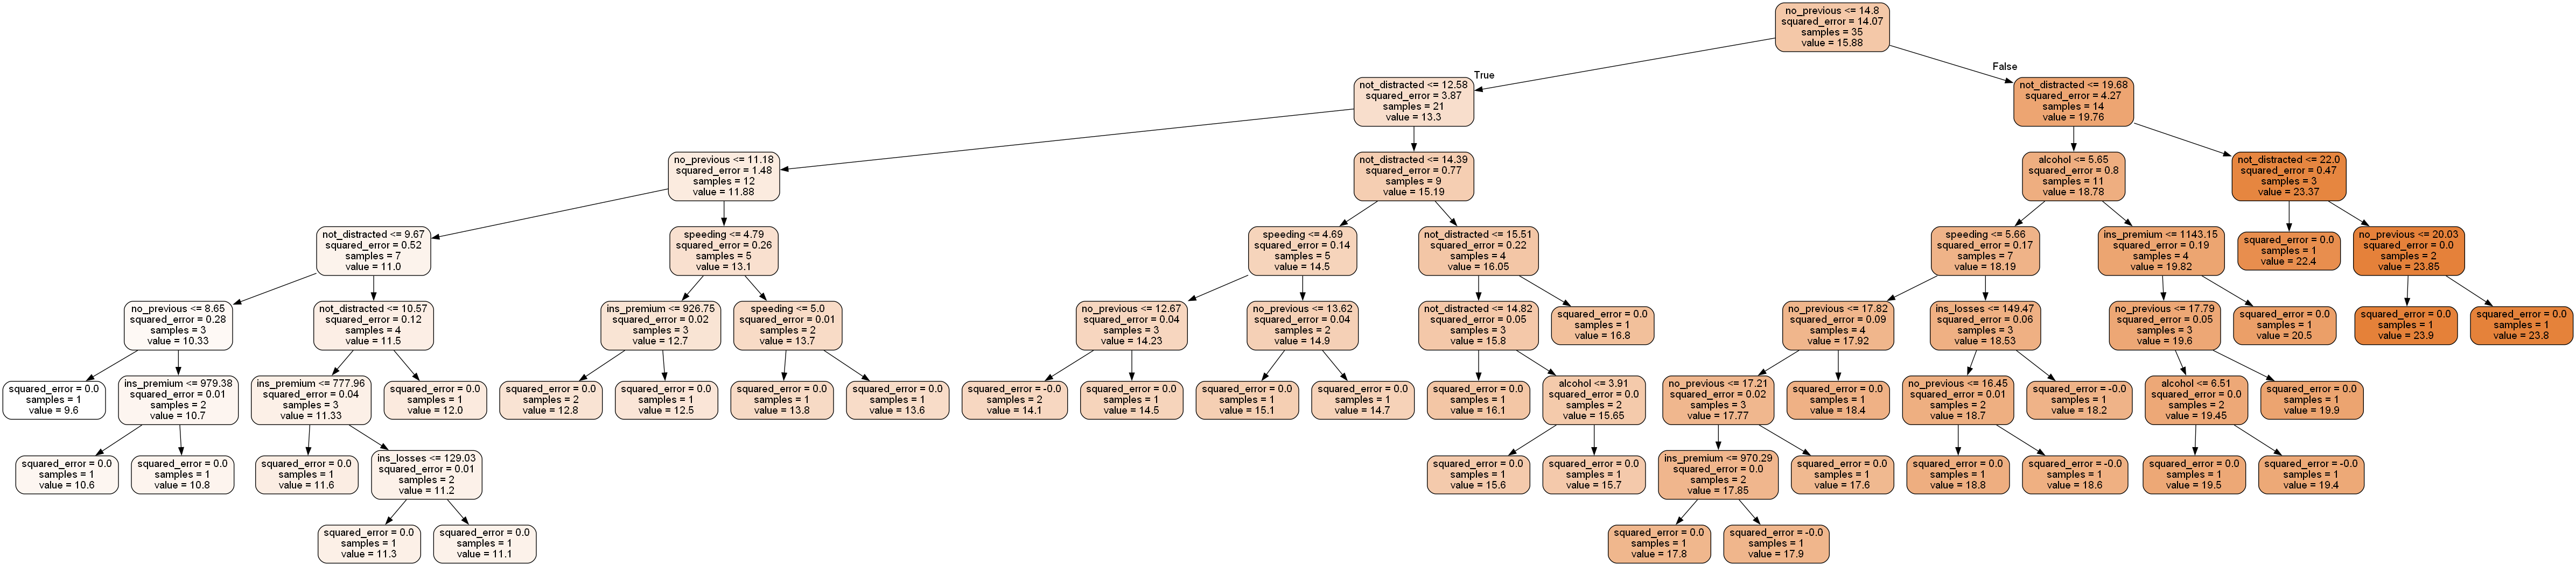

In [39]:
# 시각화 모듈 불러오기
from sklearn.tree import export_graphviz
from IPython.display import Image

# 이미지 파일 만들기
export_graphviz(model,                                 # 모델 이름
                out_file='tree.dot',                   # 파일 이름 
                feature_names=x.columns,               # Feature 이름
                class_names=['die', 'survived'],       # Target Class 이름, 회귀 일때는 사용하지 않음
                rounded=True,                          # 둥근 테두리
                precision=2,                           # 불순도 소숫점 자리수
                        # 출력한 트리 깊이 지점
                filled=True)                           # 박스 내부 채우기

# 파일 변환
!dot tree.dot -Tpng -otree.png 
# -Gdpi=300

# 이미지 파일 표시
Image(filename='tree.png')

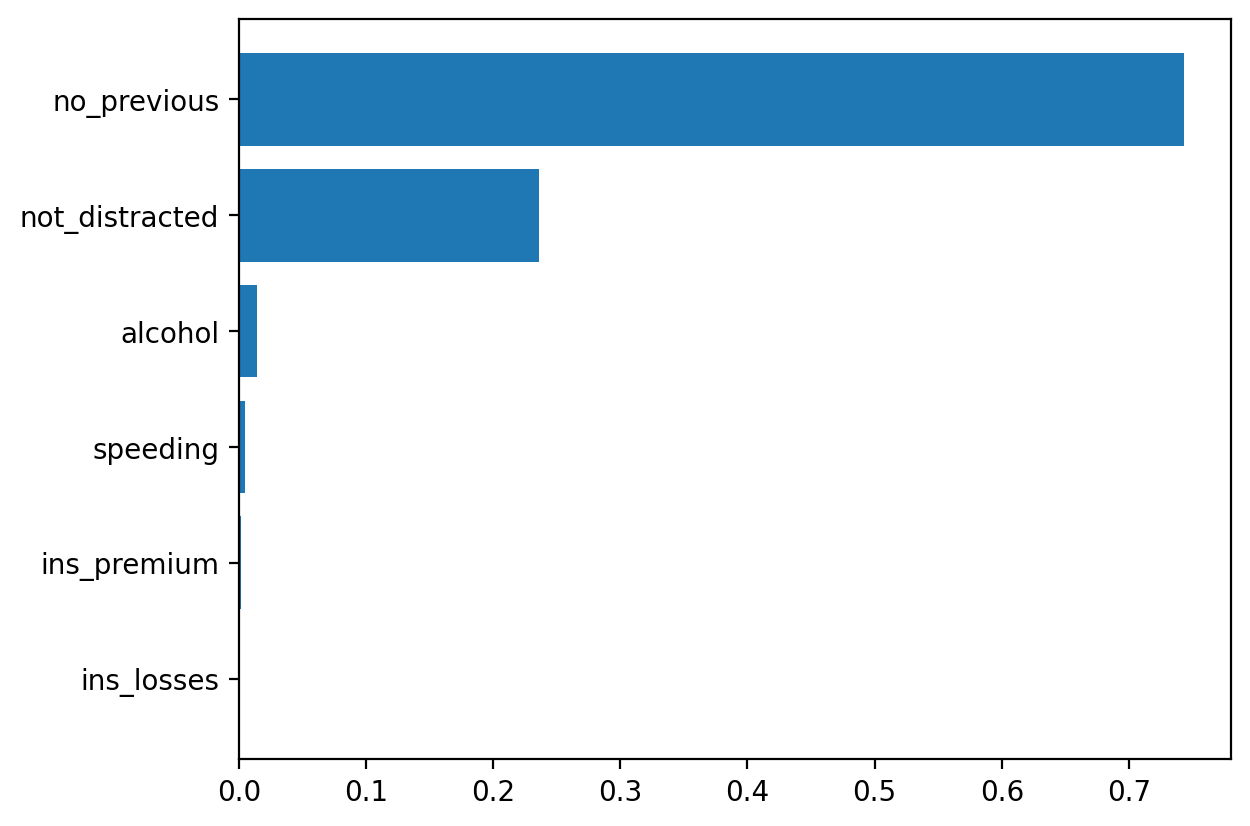

In [40]:
perf_dic = {'feature': list(x), 'importance' : model.feature_importances_}
df = pd.DataFrame(perf_dic)
df = df.sort_values('importance', ascending= True)

plt.barh(df['feature'], df['importance'])
plt.show()